### Propuesta indicadores cultura
#### Indicador del presupuesto de cultura respecto al presupuesto total de la Ciudad de México

In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import os
import time
from matplotlib import pyplot as plt
import requests
import zipfile
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

In [2]:
##Descarga de presupuestos aprobados

presupuestos={
    '2024': 'https://datos.cdmx.gob.mx/dataset/3a6cba97-adb1-4f35-9df1-984cc3657aca/resource/7fa1da81-531c-477c-93db-7580bc1c7ad0/download/egresos_2024_aprobado.csv',
    '2023': 'https://datos.cdmx.gob.mx/dataset/ea119a03-4f5a-46fa-afbe-bc32bcf79ec3/resource/5137e3db-227e-462d-8d59-1942afbc0c6a/download/egresos_2023_aprobado.csv',
    '2022': 'https://datos.cdmx.gob.mx/dataset/755f47f1-b937-4131-8a7b-fbe306e747c8/resource/fc93c940-ad75-4e7f-afe6-c624726623a9/download/egresos_2022_aprobado.csv',
    '2021': 'https://datos.cdmx.gob.mx/dataset/246be014-62ba-46e0-a7ce-9f37c8f01886/resource/682c37bd-96a2-4f78-94bf-3c77c3870f04/download/egresos_2021_aprobado.csv',
    '2020':'https://datos.cdmx.gob.mx/dataset/2bb4de63-8212-4d2a-a377-98b10f8384c6/resource/def0fc56-4e26-4cd2-9ec6-200cb86b418e/download/egresos_2020_aprobado.csv',
    '2019': 'https://datos.cdmx.gob.mx/dataset/8dc52617-63f6-4bfd-9fae-54239675c6d0/resource/9a6f53d7-1751-4ae4-8bd8-d31807be7789/download/egresos_2019_aprobado.csv',
    '2018': 'https://datos.cdmx.gob.mx/dataset/7a8820f2-3bea-4c69-8b20-1d01b1a99a6a/resource/5b20655c-072f-4347-baee-ab93d930b27b/download/egresos_2018_aprobado.csv',
}

In [3]:
#Evitar notación científica
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#Tabla en blanco
presupuestos_aprobados=pd.DataFrame()

for key in presupuestos:
    presupuestos_aprobados=pd.concat([presupuestos_aprobados,pd.read_csv(presupuestos[key], encoding="latin-1", low_memory=False)])

In [5]:
presupuestos_aprobados.head()

,clave_presupuestaria,ciclo,periodo,gobierno_general,desc_gobierno_general,sector,desc_sector,subsector,desc_subsector,unidad_responsable,...,desc_consolidado,detalle_consolidado,desc_detalle_consolidado,proyecto_inv,desc_proy_inv,tipo_proyecto,desc_tipo_proyecto,monto_aprobado,monto_modificado,monto_ejercido
0,401C001131177P02011114011311100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"25,201,851.00",0.00,0.00
1,401C001131177P02011114011321100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"2,200,197.00",0.00,0.00
2,401C001131177P02011114012111100,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,0.00,Gasto normal,NaN,NaN,NaN,NaN,"35,574,335.00",0.00,0.00
3,401C001131177P02011114012211108,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,8.00,Personal con nombramiento de carÃ¡cter provisi...,NaN,NaN,NaN,NaN,"252,548.00",0.00,0.00
4,401C001131177P02011114012311106,2024,Aprobado,1,Poder Ejecutivo,1,Jefatura de Gobierno,C0,Central,01C001,...,No,6.00,Pagos del capÃ­tulo 1000 diferentes a nÃ³mina ...,NaN,NaN,NaN,NaN,"60,000.00",0.00,0.00


In [6]:
presupuestos_aprobados["ciclo"].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018])

In [7]:
presupuestos_aprobados["cultural"] = (
    ((presupuestos_aprobados["desc_sector"] == "Cultura") & 
     (presupuestos_aprobados["area_funcional"].isin([242077, 242218, 242220, 183061, 242044])))
).astype(int)

In [8]:
# Calcular el presupuesto total por año
presupuesto_total_por_ano = presupuestos_aprobados.groupby("ciclo")["monto_aprobado"].sum()

gasto_cultural_por_ano = (
    presupuestos_aprobados[presupuestos_aprobados["cultural"] == 1]  
    .groupby("ciclo")["monto_aprobado"]  
    .sum()  
)


# Calcular el porcentaje del gasto cultural sobre el total
porcentaje_cultural = (
    gasto_cultural_por_ano / presupuesto_total_por_ano * 100
).reset_index(name="porcentaje_cultural")

# Crear un DataFrame combinado con los resultados
resultado = gasto_cultural_por_ano.reset_index(name="gasto_cultural").merge(
    presupuesto_total_por_ano.reset_index(name="presupuesto_total_cdmx"), on="ciclo"
)
resultado["porcentaje_cultural"] = (
    resultado["gasto_cultural"] / resultado["presupuesto_total_cdmx"] * 100
)
resultado

,ciclo,gasto_cultural,presupuesto_total_cdmx,porcentaje_cultural
0,2020,"321,207,940.00","238,974,793,216.00",0.13
1,2021,"220,652,365.00","217,962,157,170.00",0.10
2,2022,"225,378,707.00","234,005,875,723.00",0.10
3,2023,"688,615,665.00","248,415,083,383.00",0.28
4,2024,"954,158,234.00","267,965,350,437.00",0.36


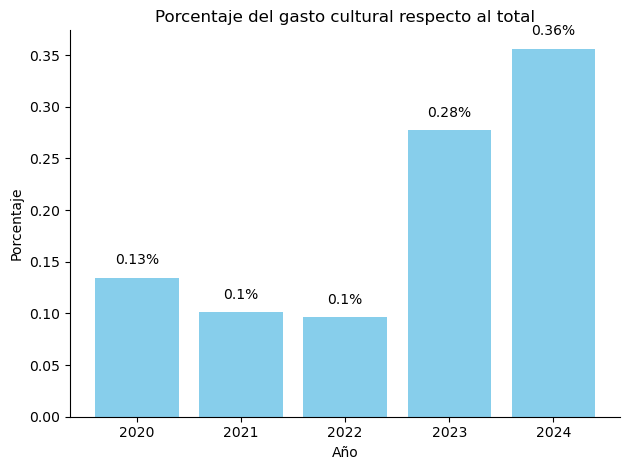

In [9]:
fig, ax = plt.subplots()

bars = ax.bar(resultado["ciclo"], resultado["porcentaje_cultural"], color="skyblue")


ax.set_title("Porcentaje del gasto cultural respecto al total")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")


for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height + 0.01,  
        f'{round(height, 2)}%',  
        ha='center', 
        va='bottom',  
        fontsize=10,
        color="black"
    )

plt.tight_layout()


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#### Indicador de valor agregado bruto de Cultura respecto al total de la Ciudad de México

In [10]:
#Webdriver
driver = webdriver.Chrome(service=Service('C:/chromedriver.exe'))
driver.maximize_window()

In [11]:
#Establecer directorio de descarga
os.chdir("C:/Users/claud/Downloads")

In [12]:
url="https://inegi.org.mx/app/tabulados/default.aspx?pr=22&vr=4&in=90&tp=20&wr=1&cno=1&idrt=3270&opc=p"

In [13]:
driver.get(url)

In [14]:
#Descargar archivo csv
driver.find_element(By.ID, 'aCsv').click()
time.sleep(1)

In [15]:
#Leer archivo csv
df = pd.read_csv('CSCM_90.csv', encoding='utf-8')
#Drop primera fila
df=df.drop(0)
#Dejar de 36 a 69
df=df.iloc[35:67]
df.columns=df.columns.str.lower()
#Filtrar si concepto es "Ciudad de México"
df=df[df["concepto"]=="Ciudad de México"]
#Dejar columnas que contengan "valor agregado bruto"
df = df[["concepto"] + df.columns[df.columns.str.contains("valor agregado bruto")].tolist()]
#Dejar el nombre de "|" hacia la izquierda
df.columns=df.columns.str.split("|").str[0]
#pasar a long
df=pd.melt(df, id_vars=["concepto"], var_name="año", value_name="valor")
#Eliminar  caracteres especiales en la columna "año" para que sean solo números
df["año"]=df["año"].str.extract("(\d+)")
df["año"]=df["año"].astype(int)
df

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\claud\AppData\Local\Temp\ipykernel_26984\2730830500.py:17: SyntaxWarning: invalid escape sequence '\d'
  df["año"]=df["año"].str.extract("(\d+)")


,concepto,año,valor
0,Ciudad de México,2008,8.42
1,Ciudad de México,2009,8.70
2,Ciudad de México,2010,8.27
3,Ciudad de México,2011,7.97
4,Ciudad de México,2012,7.68
5,Ciudad de México,2013,7.57
6,Ciudad de México,2014,7.79
7,Ciudad de México,2015,7.76
8,Ciudad de México,2016,7.30
9,Ciudad de México,2017,7.26


([<matplotlib.axis.YTick at 0x15b5d9be060>,
 [Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

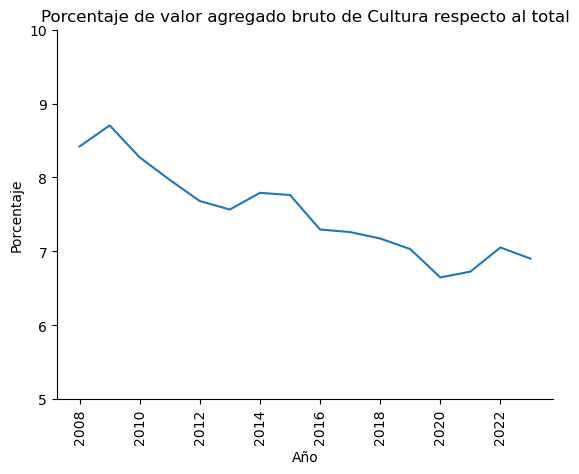

In [16]:
#Gráfica de línea
fig, ax = plt.subplots()

for concepto, datos in df.groupby("concepto"):
    ax.plot(datos["año"], datos["valor"], label=concepto)
    
ax.set_title("Porcentaje de valor agregado bruto de Cultura respecto al total")
ax.set_xlabel("Año")
ax.set_ylabel("Porcentaje")



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#90 grados de rotación
plt.xticks(rotation=90)
#y de 0 a 10
plt.yticks(range(5, 11))

#### Indicador de población ocupada en actividades culturales en la Ciudad de México

In [17]:
url="https://www.inegi.org.mx/contenidos/programas/ce/2019/Datosabiertos/ce2019_cdmx_csv.zip"

In [18]:
#Descarga y unzip

def download_unzip(url, path):
    r = requests.get(url, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'})
    with open(path, 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(path, 'r') as z:
        z.extractall(path.replace('.zip', ''))
        #Eliminar el archivo zip
    os.remove(path)

In [19]:
#Generar carpeta data
os.makedirs("data", exist_ok=True)

In [20]:
#Descarga y unzip en data
download_unzip(url, "data/ce2019_cdmx_csv.zip")

In [21]:
## Leer datos
censoeco = (
    pd.read_csv(
        "data/ce2019_cdmx_csv/conjunto_de_datos/ce2019_cdmx.csv",
        sep=",",
        low_memory=False,
        index_col=False
    )
#Limpieza
    .rename(columns=lambda x: x.strip().lower())  #Renombrar
    #Filtros y selección de variables de interés
    .query("id_estrato.isnull()")
    .query("codigo == ' ' or codigo == '71'")
    .query("municipio == ' '")
    .loc[:, ["codigo", "h001a"]]
    .T
)

# Renombrar columnas
censoeco.columns = censoeco.iloc[0]
censoeco = (
    censoeco.iloc[1:]  # Eliminar primera fila
    .rename(columns={" ": "total", "71": "culturales"})
    .assign(porcentaje=lambda df: df["culturales"].astype(float) / df["total"].astype(float) * 100)  # Calcular porcentaje
)

censoeco

codigo,total,culturales,porcentaje
h001a,"4,297,134.00","40,921.00",0.95


### Estimación de metas
Indicador de presupuesto











































































































































































































































































































































































































































































































































































































































In [22]:
os.chdir("C:/Users/claud/Documents/GitHub/pgd_cdmx/indicadores/cultura")

In [23]:
resultado

,ciclo,gasto_cultural,presupuesto_total_cdmx,porcentaje_cultural
0,2020,"321,207,940.00","238,974,793,216.00",0.13
1,2021,"220,652,365.00","217,962,157,170.00",0.10
2,2022,"225,378,707.00","234,005,875,723.00",0.10
3,2023,"688,615,665.00","248,415,083,383.00",0.28
4,2024,"954,158,234.00","267,965,350,437.00",0.36


In [24]:
X = resultado["ciclo"].values.reshape(-1, 1)  # Variable independiente (año)
y = resultado["porcentaje_cultural"].values   # Variable dependiente

# Agregar una constante para usar Statsmodels
X_sm = sm.add_constant(X)

# Entrenar el modelo con Statsmodels
model_sm = sm.OLS(y, X_sm).fit()

# Mostrar el resumen del modelo
print(model_sm.summary())


# Entrenar el modelo de regresión lineal
model = LinearRegression()
fit=model.fit(X, y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     6.959
Date:                Sun, 16 Feb 2025   Prob (F-statistic):             0.0778
Time:                        21:05:56   Log-Likelihood:                 7.1849
No. Observations:                   5   AIC:                            -10.37
Df Residuals:                       3   BIC:                            -11.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -125.0291     47.467     -2.634      0.0

C:\Users\claud\miniconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [25]:
# Predecir para los años 2025 a 2045
future_years = np.arange(2025, 2046).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    "ciclo": future_years.flatten(),
    "porcentaje_cultural": future_predictions
})

In [26]:
#Mostrar 2030, 2035 y 2045
predictions_df.query("ciclo in [2030, 2035, 2045]")

,ciclo,porcentaje_cultural
5,2030,0.69
10,2035,1.00
20,2045,1.62


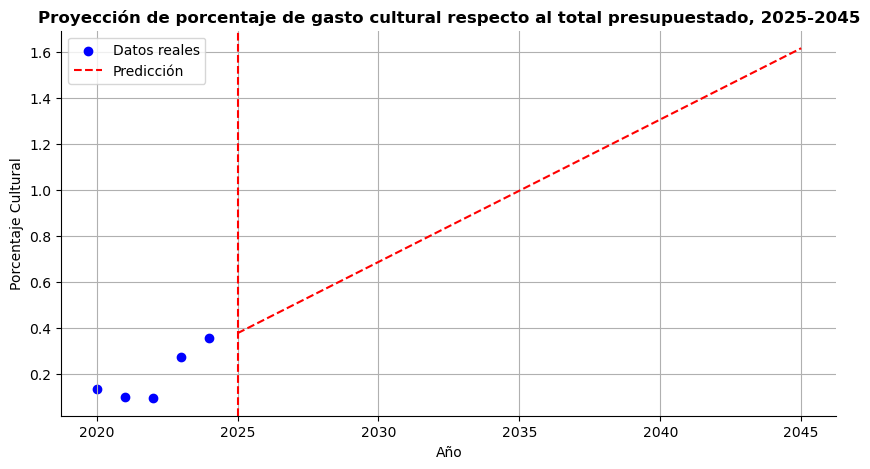

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(resultado["ciclo"], resultado["porcentaje_cultural"], color='blue', label="Datos reales")
plt.plot(future_years, future_predictions, color='red', linestyle='dashed', label="Predicción")
plt.xlabel("Año")
plt.ylabel("Porcentaje Cultural")
plt.title("Proyección de porcentaje de gasto cultural respecto al total presupuestado, 2025-2045",fontweight="bold")
plt.legend()
#Línea horizontal en 2024
plt.axvline(2025, linestyle="--", color="red")
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Indicador de valor agregado bruto


In [28]:
df_predict=df.copy()

df_predict.head(3)

,concepto,año,valor
0,Ciudad de México,2008,8.42
1,Ciudad de México,2009,8.70
2,Ciudad de México,2010,8.27


In [29]:
#Tasa de crecimiento promedio anual de 2020 a 2023
#Se establece este supuesto para establecer metas positivas hacia el futuro
tcma_valor = ((df_predict.query("año == 2023")["valor"].values[0] / df_predict.query("año == 2020")["valor"].values[0]) ** (1 / 3) - 1)
tcma_valor

np.float64(0.012576820319465387)

In [30]:
# Estimar valores de 2025 a 2045
for year in range(2024, 2046):
    if year not in df_predict["año"].values:
        df_predict = pd.concat([df_predict, pd.DataFrame({
            "concepto": ["Ciudad de México"],
            "año": [year],
            "valor": [np.nan]  # Usa np.nan en lugar de None
        })], ignore_index=True)

    # Verificar que el año anterior tenga un valor válido antes de calcular
    if not df_predict.loc[df_predict["año"] == year - 1, "valor"].isna().any():
        df_predict.loc[df_predict["año"] == year, "valor"] = (
            df_predict.loc[df_predict["año"] == year - 1, "valor"].values[0] * (1 + tcma_valor)
        )

df_predict



,concepto,año,valor
0,Ciudad de México,2008,8.42
1,Ciudad de México,2009,8.70
2,Ciudad de México,2010,8.27
3,Ciudad de México,2011,7.97
4,Ciudad de México,2012,7.68
5,Ciudad de México,2013,7.57
6,Ciudad de México,2014,7.79
7,Ciudad de México,2015,7.76
8,Ciudad de México,2016,7.30
9,Ciudad de México,2017,7.26


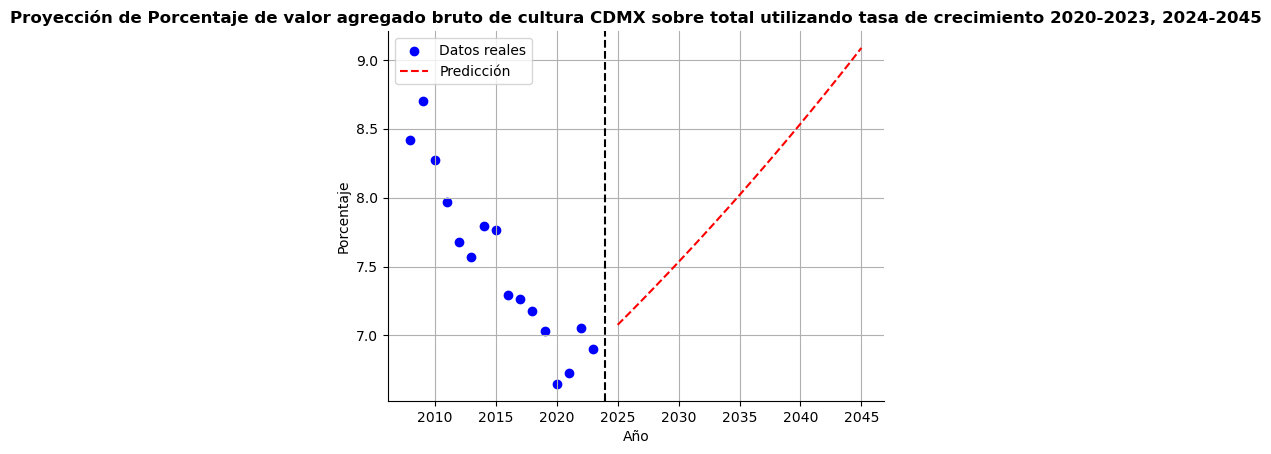

In [41]:
#Gráfica de año y valor

fig, ax = plt.subplots()

plt.scatter(df["año"], df["valor"], color='blue', label="Datos reales")
#filtrar df_predict para dejar solo los años 2025 a 2045 y hacer la gráfica
plt.plot(df_predict.query("año >= 2025")["año"], df_predict.query("año >= 2025")["valor"], color='red', linestyle='dashed', label="Predicción")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.title("Proyección de Porcentaje de valor agregado bruto de cultura CDMX sobre total utilizando tasa de crecimiento 2020-2023, 2024-2045",fontweight="bold")
plt.legend()
#Línea horizontal en 2024
plt.axvline(2024, linestyle="--", color="black")
plt.grid(True)
#Sin borde superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


#Salvar gráfica
plt.savefig("valor_agregado_bruto_cultura_tcma.png", dpi=200, bbox_inches="tight")

In [32]:
#Hacer modelo de regresión lineal para contrastar
X = df["año"].values.reshape(-1, 1)
y = df["valor"].values

#Usar statsmodels
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()

#Mostrar resumen
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     98.17
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.05e-07
Time:                        21:05:57   Log-Likelihood:                 2.3391
No. Observations:                  16   AIC:                           -0.6782
Df Residuals:                      14   BIC:                            0.8670
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5686     24.429     10.216      0.0

C:\Users\claud\miniconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [33]:
#Entrenar modelo de regresión lineal
model = LinearRegression()
fit=model.fit(X, y)


In [34]:
# Predecir para los años 2024 a 2045
future_years = np.arange(2024, 2046).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    "año": future_years.flatten(),
    "valor": future_predictions
})


In [35]:
#Mostrar 2030, 2035 y 2045
predictions_df.query("año in [2030, 2035, 2045]")

,año,valor
6,2030,5.77
11,2035,5.17
21,2045,3.97


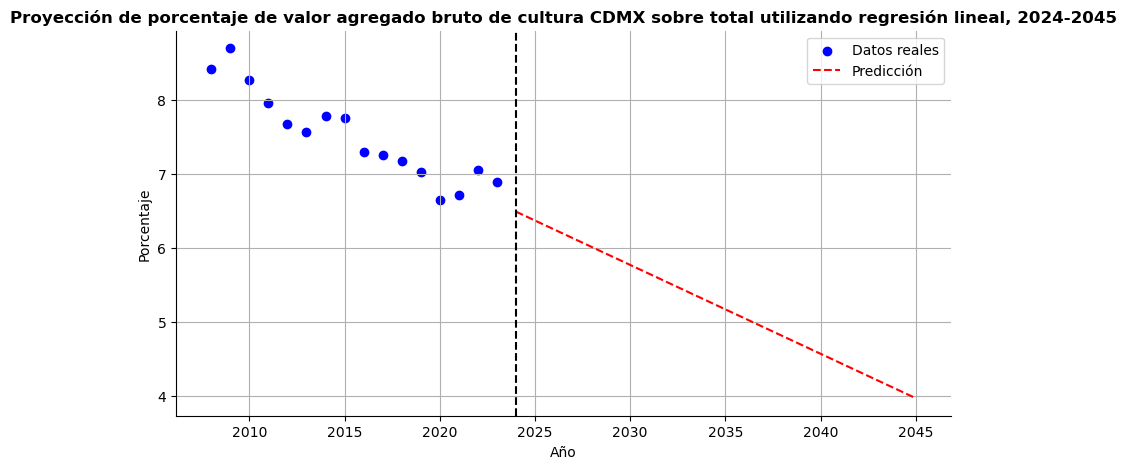

In [42]:
plt.figure(figsize=(10, 5))
plt.scatter(df["año"], df["valor"], color='blue', label="Datos reales")
plt.plot(future_years, future_predictions, color='red', linestyle='dashed', label="Predicción")
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.title("Proyección de porcentaje de valor agregado bruto de cultura CDMX sobre total utilizando regresión lineal, 2024-2045",fontweight="bold")
plt.legend()
plt.grid(True)
plt.axvline(2024, linestyle="--", color="black")

#Sin borde superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Salvar gráfica
plt.savefig("valor_agregado_bruto_cultura_regresion.png", dpi=200, bbox_inches="tight")